# 필요한 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 데카르트제곱 방법을 사용하기위해 itertools안에 product를 사용합니다.
import itertools

# 라벨링을 위한 모듈 불러오기
from sklearn.preprocessing import LabelEncoder

# 모델링 모듈 불러오기
from my_modeling import Val_Modeling, Modeling

# 데이터 불러오기 및 데이터 Reading

In [2]:
categ= pd.read_csv('./data/item_categories.csv')
items = pd.read_csv('./data/items.csv')
train = pd.read_csv('./data/sales_train.csv')
shops = pd.read_csv('./data/shops.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
categ.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
item_merge = pd.merge(items, categ, on = 'item_category_id')
item_merge.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


In [6]:
train = pd.merge(train, item_merge, on = 'item_id')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [7]:
# 중복값 체크하기

train[train.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
425880,31.12.2014,23,42,21619,499.0,1.0,ЧЕЛОВЕК ДОЖДЯ (BD),37,Кино - Blu-Ray
1047615,05.01.2013,0,54,20130,149.0,1.0,УЧЕНИК ЧАРОДЕЯ (регион),40,Кино - DVD
1681245,23.02.2014,13,50,3423,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360
1681313,23.03.2014,14,21,3423,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360
1681546,01.05.2014,16,50,3423,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360
1681785,12.07.2014,18,25,3423,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360


In [8]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [9]:
len(set(test['item_id']))

5100

In [10]:
len(set(train['item_id']))

21807

In [11]:
# 테스트 데이터에만 있는 item_id 값들 확인
# 이 부분을 어떻게 해야할지 고민해야 함

len(set(test['item_id'])-set(train['item_id']))

# 363개가 테스트에만 있음.

363

In [12]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [13]:
# train 과 shops 를 merge 시키기

train = train.merge(shops, on='shop_id')

c:\Users\SBAUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


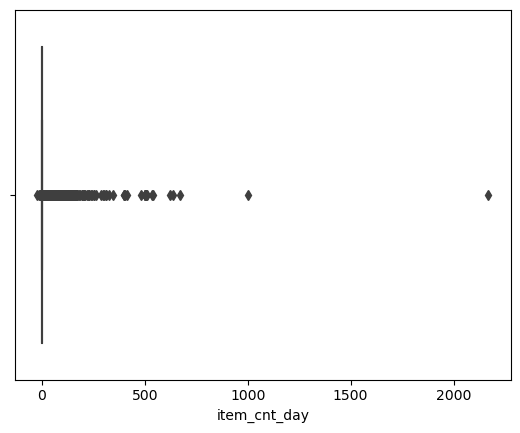

In [14]:
# 'item_cnt_day' boxplot 확인하기

sns.boxplot(train['item_cnt_day'])
plt.show()


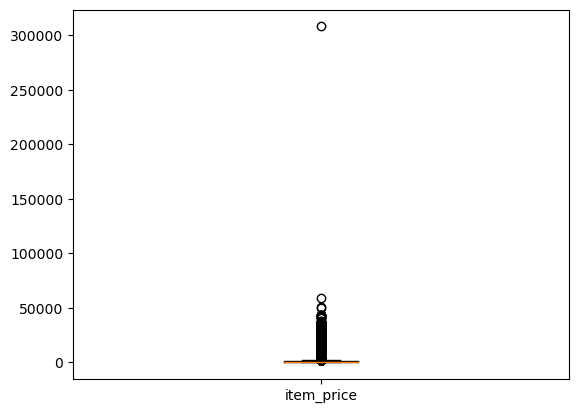

In [15]:
# 'item_price' boxplot 확인하기

plt.boxplot(train['item_price'])
plt.xticks([1],['item_price']) # 1을 item_price로 바꾼다
plt.show()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [17]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


item_price가 -인 것은 무엇일까?

item_cnt_day가 -인것은 무엇일까?

In [18]:
# item_price가 0보다 작은 데이터 확인하기

train[train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2717783,15.05.2013,4,32,2973,-1.0,1.0,"DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,"Москва ТЦ ""Серебряный Дом"""


아이템 이름 : DmC Devil May Cry [PS3, 러시아어 자막]

아이템 카테고리 : 게임 - PS3

상점이름 : 모스크바 쇼핑 센터 "실버 하우스"

In [19]:
# item_cnt_day가 0보다 작은 것 살펴보기
train[train['item_cnt_day'] < 0]['item_cnt_day'].value_counts()


-1.0     7252
-2.0       78
-3.0       14
-5.0        4
-4.0        3
-6.0        2
-16.0       1
-22.0       1
-9.0        1
Name: item_cnt_day, dtype: int64

데이터가 굉장히 많다. 

실수로 입력된 값인지 환불에대한 정보인지 알 방법이 없다.

In [20]:
# item_cnt_day 가 비정상 적으로 높은 값은 무엇일까?

train[train['item_cnt_day'] > 20]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
6266,04.04.2015,27,59,6740,499.000000,27.0,"StarCraft II: Wings of Liberty [PC, Jewel, рус...",30,Игры PC - Стандартные издания,"Ярославль ТЦ ""Альтаир"""
23548,14.06.2013,5,59,16787,2567.461538,26.0,"Одни из нас [PS3, русская версия]",19,Игры - PS3,"Ярославль ТЦ ""Альтаир"""
26083,17.09.2013,8,59,3732,2512.846154,39.0,"Grand Theft Auto V [PS3, русские субтитры]",19,Игры - PS3,"Ярославль ТЦ ""Альтаир"""
26084,18.09.2013,8,59,3732,2475.785714,28.0,"Grand Theft Auto V [PS3, русские субтитры]",19,Игры - PS3,"Ярославль ТЦ ""Альтаир"""
27497,29.10.2013,9,59,1849,1190.111111,27.0,"Battlefield 4 Limited Edition [PC, русская вер...",28,Игры PC - Дополнительные издания,"Ярославль ТЦ ""Альтаир"""
...,...,...,...,...,...,...,...,...,...,...
2934602,19.04.2015,27,55,3730,1999.000000,33.0,"Grand Theft Auto V [PC, Цифровая версия]",31,Игры PC - Цифра,Цифровой склад 1С-Онлайн
2934662,10.04.2015,27,55,3729,1999.000000,26.0,"Grand Theft Auto V (предзаказ3) [PC, Цифровая ...",31,Игры PC - Цифра,Цифровой склад 1С-Онлайн
2934665,13.04.2015,27,55,3729,1999.000000,52.0,"Grand Theft Auto V (предзаказ3) [PC, Цифровая ...",31,Игры PC - Цифра,Цифровой склад 1С-Онлайн
2934667,12.04.2015,27,55,3729,1999.000000,26.0,"Grand Theft Auto V (предзаказ3) [PC, Цифровая ...",31,Игры PC - Цифра,Цифровой склад 1С-Онлайн


In [21]:
train['item_category_name'].apply(lambda x : x.split()[0]).unique()

# 계략 / 게임?
# 영화
# 음악
# 현재의 / 선물?
# 부속품
# 서적
# 프로그램
# 카드
# 노름 / 콘솔게임?
# 서비스
# 강요 / 배터리
# 순수한
# 배달
# 티켓
# pc

# 큰 분류로 나눌수 있지 않을까?

array(['Кино', 'Музыка', 'Игры', 'Программы', 'Подарки', 'Книги',
       'Аксессуары', 'Игровые', 'Карты', 'Служебные', 'Элементы',
       'Билеты', 'Чистые', 'PC', 'Доставка'], dtype=object)

In [22]:
pd.DataFrame(train['shop_name'].apply(lambda x : x.split()[0]).value_counts())

,shop_name
Москва,996636
Якутск,188869
СПб,148535
Воронеж,144151
Химки,143480
Тюмень,125455
Уфа,96423
Красноярск,76177
Самара,75421
Чехов,69573


- 모스크바
- 야쿠츠크
- 세인트 피터스 버그
- 보로네시
- 튜멘
- 힘키
- 우파
- 크라스노야르스크
- 익과
- N.노브고로드
- 세르기예프
- 돈에 로스토프
- 수르구트
- 쿠르스크
- 체호프
- 칼루가
- 콜롬나
- 옴스크
- 카잔
- 야로슬라블
- 볼로그다
- 노보시비르스크
- 볼시스키
- 온라인 매장
- 디지털
- 톰스크
- 아디게아
- 발라시하
- 주코프스키
- 미티시치
- !야쿠츠크
- 방문

In [23]:
train[train['shop_name'].apply(lambda x : x.split()[0]) == '!Якутск']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
1363898,22.02.2013,1,1,22154,657.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"!Якутск ТЦ ""Центральный"" фран"
1363899,18.01.2013,0,1,2574,282.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"!Якутск ТЦ ""Центральный"" фран"
1363900,09.01.2013,0,1,2574,282.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"!Якутск ТЦ ""Центральный"" фран"
1363901,08.01.2013,0,1,2716,94.0,1.0,Darksiders (PC-DVD) (DVD-box),28,Игры PC - Дополнительные издания,"!Якутск ТЦ ""Центральный"" фран"
1363902,12.01.2013,0,1,2716,94.0,1.0,Darksiders (PC-DVD) (DVD-box),28,Игры PC - Дополнительные издания,"!Якутск ТЦ ""Центральный"" фран"
...,...,...,...,...,...,...,...,...,...,...
1379428,28.02.2013,1,0,13034,27.0,1.0,КУНГ-ФУ КРОЛИК,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1379429,10.02.2013,1,0,13913,328.0,1.0,ЛЕТО. ОДНОКЛАСНИКИ. ЛЮБОВЬ (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
1379430,28.02.2013,1,0,14156,27.0,2.0,Легенды русского рока. The Best (mp3) (Jewel),57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"
1379431,28.02.2013,1,0,13799,27.0,1.0,ЛАСКОВЫЙ МАЙ / ЛЮБОВЬ В БОЛЬШОМ ГОРОДЕ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"


In [24]:
train[train['shop_name'].apply(lambda x : x.split()[0]) == 'Якутск']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
1521667,05.03.2013,2,57,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Якутск Орджоникидзе, 56"
1521668,29.04.2013,3,57,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Якутск Орджоникидзе, 56"
1521669,27.10.2013,9,57,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Якутск Орджоникидзе, 56"
1521670,20.07.2015,30,57,22154,299.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Якутск Орджоникидзе, 56"
1521671,05.09.2015,32,57,22154,299.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Якутск Орджоникидзе, 56"
...,...,...,...,...,...,...,...,...,...,...
1717494,25.10.2015,33,58,21548,399.0,1.0,ЦЕНА ЧЕЛОВЕКА,40,Кино - DVD,"Якутск ТЦ ""Центральный"""
1717495,30.10.2015,33,58,21548,399.0,1.0,ЦЕНА ЧЕЛОВЕКА,40,Кино - DVD,"Якутск ТЦ ""Центральный"""
1717496,24.10.2015,33,58,4053,2499.0,1.0,Just Dance 2016 (только для MS Kinect) [Xbox 3...,23,Игры - XBOX 360,"Якутск ТЦ ""Центральный"""
1717497,25.10.2015,33,58,4053,2499.0,1.0,Just Dance 2016 (только для MS Kinect) [Xbox 3...,23,Игры - XBOX 360,"Якутск ТЦ ""Центральный"""


Якутск 와 !Якутск 이 겹치는 것을 확인 할 수 있다. 처리를 해서 같은 것으로 묶어야 될 것 같다

In [25]:
def check_item_price_plot(df, shop_id, item_id) :
    condition = (df['shop_id'] == shop_id) & (df['item_id'] == item_id)
    item_data = df[condition]
    
    print('shop_id :', shop_id, '\nitem_id :', item_id)
    fig, ax = plt.subplots()
    sns.lineplot(data = item_data, x = 'date', y = 'item_price')
    plt.xticks(rotation = 45)


shop_id : 5 
item_id : 5037


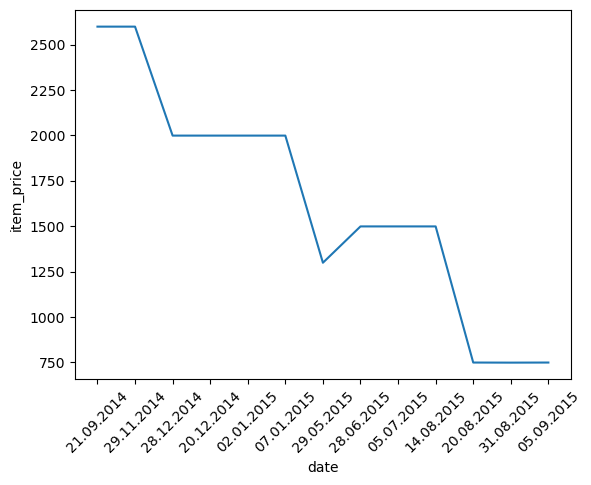

In [26]:
check_item_price_plot(train, 5, 5037)

shop_id : 6 
item_id : 3624


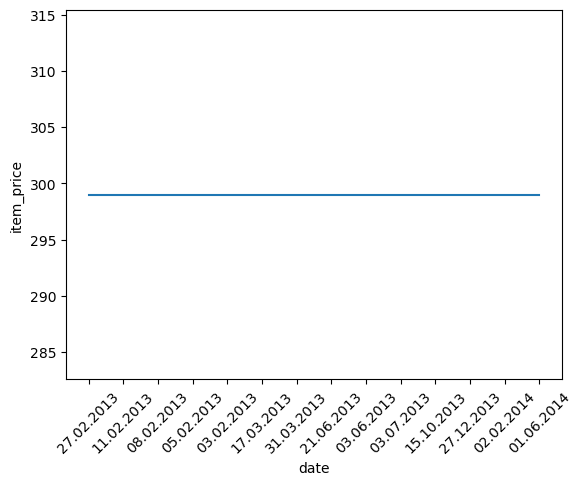

In [27]:
shop_id = random.choice(train['shop_id'])
item_id = random.choice(train['item_id'])
check_item_price_plot(train, shop_id, item_id)

# 데이터 가공

In [28]:
# 데이터 불러오기 

categ= pd.read_csv('./data/item_categories.csv')
items = pd.read_csv('./data/items.csv')
train = pd.read_csv('./data/sales_train.csv')
shops = pd.read_csv('./data/shops.csv')
test = pd.read_csv('./data/test.csv')

In [29]:
item_merge = pd.merge(items, categ, on = 'item_category_id')

In [30]:
# merge 하기 전에 shop_name, item_category_name 전처리하기
shops['city'] = shops['shop_name'].apply(lambda x : x.split()[0])
shops

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
6,"Воронеж (Плехановская, 13)",6,Воронеж
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж
9,Выездная Торговля,9,Выездная


도시이름 앞에 !가 있는것을 제거해 줘야 한다

In [31]:
# !가 없어진 것을 확인했다.

shops['city'] = shops['city'].str.replace('!', '')
shops

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
6,"Воронеж (Плехановская, 13)",6,Воронеж
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж
9,Выездная Торговля,9,Выездная


In [32]:
encoder = LabelEncoder()
shops['city_num'] = encoder.fit_transform(shops['city'])
shops

,shop_name,shop_id,city,city_num
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,29
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,29
2,"Адыгея ТЦ ""Мега""",2,Адыгея,0
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,1
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,2
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,3
6,"Воронеж (Плехановская, 13)",6,Воронеж,4
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,4
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,4
9,Выездная Торговля,9,Выездная,5


In [33]:
shops = shops.drop(['city','shop_name'], axis=1)
shops

,shop_id,city_num
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2
5,5,3
6,6,4
7,7,4
8,8,4
9,9,5


In [34]:
item_merge['type'] = item_merge['item_category_name'].apply(lambda x : x.split()[0])
item_merge

,item_name,item_id,item_category_id,item_category_name,type
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,Кино
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,Кино
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,Кино
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD,Кино
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD,Кино
...,...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания,Элементы
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания,Элементы
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания,Элементы
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания,Элементы


In [35]:
item_merge['two_type'] = item_merge['item_category_name'].str.split(' - ')
item_merge

,item_name,item_id,item_category_id,item_category_name,type,two_type
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,Кино,"[Кино, DVD]"
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,Кино,"[Кино, DVD]"
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,Кино,"[Кино, DVD]"
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD,Кино,"[Кино, DVD]"
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD,Кино,"[Кино, DVD]"
...,...,...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания,Элементы,[Элементы питания]
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания,Элементы,[Элементы питания]
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания,Элементы,[Элементы питания]
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания,Элементы,[Элементы питания]


In [36]:
item_merge['sub_type'] = item_merge['two_type'].apply(lambda x : x[1] if len(x) > 1 else x[0])
item_merge

,item_name,item_id,item_category_id,item_category_name,type,two_type,sub_type
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,Кино,"[Кино, DVD]",DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,Кино,"[Кино, DVD]",DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,Кино,"[Кино, DVD]",DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD,Кино,"[Кино, DVD]",DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD,Кино,"[Кино, DVD]",DVD
...,...,...,...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания,Элементы,[Элементы питания],Элементы питания
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания,Элементы,[Элементы питания],Элементы питания
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания,Элементы,[Элементы питания],Элементы питания
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания,Элементы,[Элементы питания],Элементы питания


In [37]:
item_merge = item_merge.drop('two_type', axis = 1)
item_merge

,item_name,item_id,item_category_id,item_category_name,type,sub_type
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,Кино,DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,Кино,DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,Кино,DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD,Кино,DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD,Кино,DVD
...,...,...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания,Элементы,Элементы питания
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания,Элементы,Элементы питания
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания,Элементы,Элементы питания
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания,Элементы,Элементы питания


In [38]:
item_merge['type_num'] = encoder.fit_transform(item_merge['type'])
item_merge['sub_type_num'] = encoder.fit_transform(item_merge['sub_type'])
item_merge

,item_name,item_id,item_category_id,item_category_name,type,sub_type,type_num,sub_type_num
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,Кино,DVD,7,6
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,Кино,DVD,7,6
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,Кино,DVD,7,6
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD,Кино,DVD,7,6
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD,Кино,DVD,7,6
...,...,...,...,...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания,Элементы,Элементы питания,14,66
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания,Элементы,Элементы питания,14,66
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания,Элементы,Элементы питания,14,66
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания,Элементы,Элементы питания,14,66


In [39]:
item_merge = item_merge.drop(['type', 'sub_type','item_name', 'item_category_name'], axis = 1)
item_merge

,item_id,item_category_id,type_num,sub_type_num
0,0,40,7,6
1,2,40,7,6
2,3,40,7,6
3,4,40,7,6
4,5,40,7,6
...,...,...,...,...
22165,22095,83,14,66
22166,22096,83,14,66
22167,22097,83,14,66
22168,22098,83,14,66


In [40]:
# 중복 제거 하기

train.drop_duplicates(inplace = True)


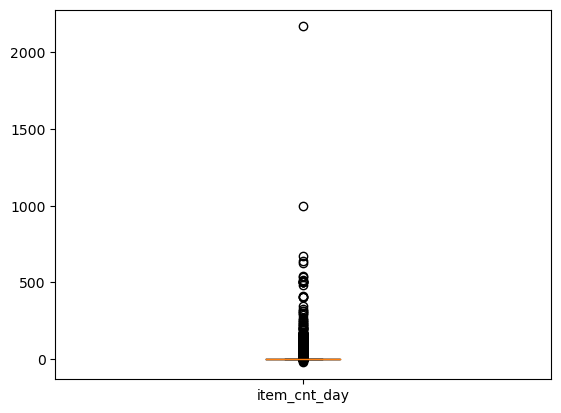

In [41]:
# 'item_cnt_day' boxplot 확인하기

plt.boxplot(train['item_cnt_day'])
plt.xticks([1],['item_cnt_day'])
plt.show()

In [42]:
# 완전히 동 떨어져 있는 데이터 제거하기
# 500을 기준으로 500이상인 것들을 없앴습니다.

train = train.drop(train[train['item_cnt_day'] >= 500].index, axis=0)

In [43]:
# 0 아래인 값들도 없앴습니다.

train = train.drop(train[train['item_cnt_day'] < 0].index, axis=0)

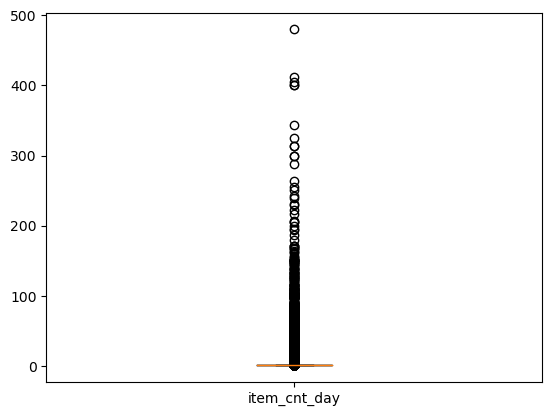

In [44]:
# 'item_cnt_day' boxplot 재확인 하기

plt.boxplot(train['item_cnt_day'])
plt.xticks([1],['item_cnt_day'])
plt.show()

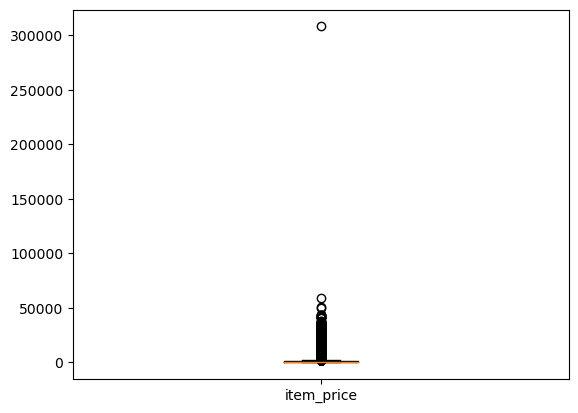

In [45]:
# 'item_price' boxplot 확인하기

plt.boxplot(train['item_price'])
plt.xticks([1],['item_price'])
plt.show()

In [46]:
# 완전히 동 떨어져 있는 데이터 제거하기
# 50000을 기준으로 50000이상은 것들을 제거하였습니다.

train = train.drop(train[train['item_price'] >= 50000].index, axis=0)

In [47]:
# 0 아래인 값들도 없앴습니다.

train = train.drop(train[train['item_price'] < 0].index, axis=0)

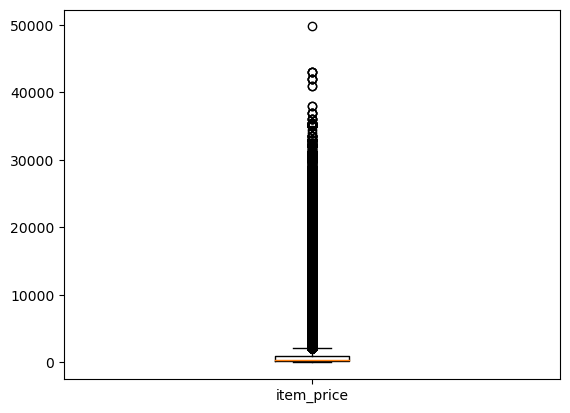

In [48]:
# 'item_price' boxplot 재확인 하기

plt.boxplot(train['item_price'])
plt.xticks([1],['item_price'])
plt.show()

In [49]:
# date 컬럼 datetime 형태로 바꾸기

train['date'] = pd.to_datetime(train['date'], dayfirst=True)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0


In [50]:
# date 컬럼의 datetime을 가지고 연도, 월, 일 컬럼을 생성하기

train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['year_month'] = train['date'].dt.strftime("%Y-%m")

In [51]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,year_month
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,2013-01
5,2013-01-10,0,25,2564,349.00,1.0,2013,1,2013-01


In [52]:
# 저번달에는 안 팔렸고 이번달에는 팔렸던 것들이 있습니다.
# 저번달에는 안 팔린것은 아예 표시를 해주지 않았습니다. 그렇기에 그러한 부분들을 0으로 넣어주어야 하는데 
# 그렇게 해줄려면 새로운 matrix / 즉 새로운 데이터프레임을 만들어야 할 것 같습니다.

In [53]:
# itertools.product 함수를 사용해서 새로운 matrix / 새로운 데이터프레임 만들기

In [54]:
new_matrix = []
m_cols = ['date_block_num', 'shop_id', 'item_id']
for i in range(34):
    month_num = train[train['date_block_num'] == i]
    new_matrix.append(np.array(list(itertools.product([i],month_num['shop_id'].unique(),month_num['item_id'].unique()))))

new_matrix = pd.DataFrame(np.vstack(new_matrix), columns=m_cols) # 새로로 결합해줘야지 안해주면 하나의 열로 다 붙여서 나옵니다.
new_matrix.sort_values(m_cols, inplace=True)
new_matrix

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28
142572,0,0,29
138861,0,0,32
...,...,...,...
10739498,33,59,22162
10739688,33,59,22163
10740354,33,59,22164
10741880,33,59,22166


In [55]:
new_matrix

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28
142572,0,0,29
138861,0,0,32
...,...,...,...
10739498,33,59,22162
10739688,33,59,22163
10740354,33,59,22164
10741880,33,59,22166


In [56]:
# item_cnt_day 월별로 합친 개수로 데이터프레임화 하기

item_cnt = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day':'sum'})

In [57]:
item_cnt.reset_index(inplace = True)

In [58]:
item_cnt.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [59]:
# 칼럼 이름 바꾸어주기

item_cnt.rename(columns={'item_cnt_day' : 'item_cnt_month'},inplace=True)

In [60]:
item_cnt

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1608216,33,59,22087,6.0
1608217,33,59,22088,2.0
1608218,33,59,22091,1.0
1608219,33,59,22100,1.0


In [61]:
new_matrix.head()

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28
142572,0,0,29
138861,0,0,32


In [62]:
# 새로운 메트릭스에 merge 시키기

new_matrix = pd.merge(new_matrix,item_cnt, how='left')

new_matrix

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,NaN
1,0,0,27,NaN
2,0,0,28,NaN
3,0,0,29,NaN
4,0,0,32,6.0
...,...,...,...,...
10884455,33,59,22162,NaN
10884456,33,59,22163,NaN
10884457,33,59,22164,NaN
10884458,33,59,22166,NaN


In [63]:
len(new_matrix['item_cnt_month'])

10884460

In [64]:
len(new_matrix[new_matrix['item_cnt_month'] >= 20])

12509

In [65]:
len(new_matrix[new_matrix['item_cnt_month'] >= 20])/len(new_matrix['item_cnt_month'])*100
# 전체 데이터에 0.11퍼센트를 차지하므로 이상치 제거를 하겠습니다.

0.11492531554160702

In [66]:
# clip 을 사용해서 범위 제한하기

new_matrix['item_cnt_month'] = new_matrix['item_cnt_month'].fillna(0).clip(0, 20).astype(np.float16)

In [67]:
new_matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0


In [68]:
new_matrix

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0
...,...,...,...,...
10884455,33,59,22162,0.0
10884456,33,59,22163,0.0
10884457,33,59,22164,0.0
10884458,33,59,22166,0.0


In [69]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [70]:
test['date_block_num'] = 34
test

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34
...,...,...,...,...
214195,214195,45,18454,34
214196,214196,45,16188,34
214197,214197,45,15757,34
214198,214198,45,19648,34


In [71]:
new_matrix = pd.concat([new_matrix, test], ignore_index=True) # ignore_index=Ture : 인덱스 예쁘게 정렬해주기
new_matrix.fillna(0, inplace=True)
new_matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID
0,0,0,19,0.0,0.0
1,0,0,27,0.0,0.0
2,0,0,28,0.0,0.0
3,0,0,29,0.0,0.0
4,0,0,32,6.0,0.0


In [72]:
new_matrix = pd.merge(new_matrix, shops, how='left')
new_matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num
0,0,0,19,0.0,0.0,29
1,0,0,27,0.0,0.0,29
2,0,0,28,0.0,0.0,29
3,0,0,29,0.0,0.0,29
4,0,0,32,6.0,0.0,29


In [73]:
new_matrix = pd.merge(new_matrix, item_merge, how='left')
new_matrix

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num
0,0,0,19,0.0,0.0,29,40,7,6
1,0,0,27,0.0,0.0,29,19,5,12
2,0,0,28,0.0,0.0,29,30,5,57
3,0,0,29,0.0,0.0,29,23,5,18
4,0,0,32,6.0,0.0,29,40,7,6
...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4
11098656,34,45,16188,0.0,214196.0,20,64,10,44
11098657,34,45,15757,0.0,214197.0,20,55,9,4
11098658,34,45,19648,0.0,214198.0,20,40,7,6


In [74]:
# 새로운 데이터프레임을 만들었으므로 저장을 해준다!
# new_matrix.to_csv('./final/new_matrix.csv', index = False)

In [75]:
matrix_practice = new_matrix.copy()
matrix_practice

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num
0,0,0,19,0.0,0.0,29,40,7,6
1,0,0,27,0.0,0.0,29,19,5,12
2,0,0,28,0.0,0.0,29,30,5,57
3,0,0,29,0.0,0.0,29,23,5,18
4,0,0,32,6.0,0.0,29,40,7,6
...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4
11098656,34,45,16188,0.0,214196.0,20,64,10,44
11098657,34,45,15757,0.0,214197.0,20,55,9,4
11098658,34,45,19648,0.0,214198.0,20,40,7,6


In [76]:
# lagdata를 만들기 위한 함수 정의
def lag_feature(made_matrix, lags, col):
    lag_make = made_matrix[['date_block_num','shop_id','item_id',col]]
    for i in lags:
        shift_data = lag_make.copy()
        shift_data.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shift_data['date_block_num'] += i
        made_matrix = pd.merge(made_matrix, shift_data, on=['date_block_num','shop_id','item_id'], how='left')
    return made_matrix


In [77]:
# 1,2,3,6,12개월을 기준으로 lag data(과거)를 만들어주기 / (item_cnt_month) 기준
# 1개월은 각 개월마다의 추세를 알기 위해서 2개월은 예를 들어 1월에는 하락세였는데 2월에는 상승세로 올라갈 수도 있어서 2개월을 봐줘야하고
# 3개월은 분기마다의 추세를 알기 위해서 6개월은 반기마다의 추세를 알기 위해 12개월은 1년마다의 추세를 알기 위해서 각각 정해서 넣어줬습니다.
# 이동 평균선이란 개념을 사용했습니다. 
# 참고자료 : https://www.youtube.com/watch?v=u_rVNwv9MoA&t=279s

df = lag_feature(new_matrix, [1,2,3,6,12], 'item_cnt_month')

In [78]:
df

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
0,0,0,19,0.0,0.0,29,40,7,6,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,5,57,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,7,6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,0.0,0.0,0.0,NaN
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,0.0,NaN,NaN,NaN
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,0.0,0.0,0.0,0.0
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,0.0,0.0,0.0,NaN


In [79]:
# 월별 평균 판매량 추가
# 월별로 판매량의 평균을 구해보았습니다.
# 판매량을 예측해야하기 때문에 평균 판매량을 
# 알면 그 달에 평균적으로 몇 개를 팔렸는지에 대한 정보를 알 수 있기 때문에 넣어주었습니다.

item_cnt_mean = new_matrix.groupby(['date_block_num']).agg({'item_cnt_month' : ['mean']})

In [80]:
item_cnt_mean.columns = ['item_cnt_mean']
item_cnt_mean.reset_index(inplace = True)

In [81]:
item_cnt_mean.head()

,date_block_num,item_cnt_mean
0,0,0.348145
1,1,0.325195
2,2,0.356445
3,3,0.282227
4,4,0.265625


In [82]:
# 월별 평균 판매량 추가해주기

df = pd.merge(df, item_cnt_mean, on=['date_block_num'], how='left')
df

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,item_cnt_mean
0,0,0,19,0.0,0.0,29,40,7,6,NaN,NaN,NaN,NaN,NaN,0.348145
1,0,0,27,0.0,0.0,29,19,5,12,NaN,NaN,NaN,NaN,NaN,0.348145
2,0,0,28,0.0,0.0,29,30,5,57,NaN,NaN,NaN,NaN,NaN,0.348145
3,0,0,29,0.0,0.0,29,23,5,18,NaN,NaN,NaN,NaN,NaN,0.348145
4,0,0,32,6.0,0.0,29,40,7,6,NaN,NaN,NaN,NaN,NaN,0.348145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,0.0,0.0,0.0,NaN,0.000000
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,0.0,NaN,NaN,NaN,0.000000
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,0.0,0.0,0.0,0.0,0.000000
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,0.0,0.0,0.0,NaN,0.000000


In [83]:
# 1,2,3,6,12개월마다 과거 평균 판매량 추가

df = lag_feature(df,[1,2,3,6,12],'item_cnt_mean')

In [84]:
df

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,item_cnt_mean,item_cnt_mean_lag_1,item_cnt_mean_lag_2,item_cnt_mean_lag_3,item_cnt_mean_lag_6,item_cnt_mean_lag_12
0,0,0,19,0.0,0.0,29,40,7,6,NaN,NaN,NaN,NaN,NaN,0.348145,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,NaN,NaN,NaN,NaN,0.348145,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,5,57,NaN,NaN,NaN,NaN,NaN,0.348145,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,NaN,NaN,NaN,NaN,0.348145,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,7,6,NaN,NaN,NaN,NaN,NaN,0.348145,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,0.0,0.0,0.0,NaN,0.000000,0.259033,0.270752,0.288574,0.26001,NaN
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,0.0,NaN,NaN,NaN,0.000000,0.259033,0.270752,NaN,NaN,NaN
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.259033,0.270752,0.288574,0.26001,0.312012
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,0.0,0.0,0.0,NaN,0.000000,0.259033,0.270752,0.288574,0.26001,NaN


In [85]:
# 1,2,3,6,12개월마다 과거 item별 평균 판매 수량 추가하기

item_id_mean = df.groupby(['date_block_num','item_id']).agg({'item_cnt_month' : ['mean']})
item_id_mean.columns = ['item_id_month_mean']
item_id_mean.reset_index(inplace=True)

df = pd.merge(df, item_id_mean, on=['date_block_num','item_id'], how='left')
df = lag_feature(df, [1,2,3,6,12], 'item_id_month_mean')
df.drop(['item_id_month_mean'], axis=1, inplace=True)

In [86]:
# 그달의 타겟 정보가 들어있으므로 제거해준다.
df.drop(columns=['item_cnt_mean'],inplace=True)

In [87]:
df.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,item_cnt_mean_lag_1,item_cnt_mean_lag_2,item_cnt_mean_lag_3,item_cnt_mean_lag_6,item_cnt_mean_lag_12,item_id_month_mean_lag_1,item_id_month_mean_lag_2,item_id_month_mean_lag_3,item_id_month_mean_lag_6,item_id_month_mean_lag_12
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# 1,2,3,6,12개월마다 과거 상점마다의 평균 판매수량 추가하기

shop_id_mean = df.groupby(['date_block_num','shop_id']).agg({'item_cnt_month' : ['mean']})
shop_id_mean.columns = ['shop_id_month_mean']
shop_id_mean.reset_index(inplace=True)

df = pd.merge(df, shop_id_mean, on=['date_block_num','shop_id'], how='left')
df = lag_feature(df, [1,2,3,6,12], 'shop_id_month_mean')
df.drop(['shop_id_month_mean'], axis=1, inplace=True)

In [89]:
df.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,item_id_month_mean_lag_1,item_id_month_mean_lag_2,item_id_month_mean_lag_3,item_id_month_mean_lag_6,item_id_month_mean_lag_12,shop_id_month_mean_lag_1,shop_id_month_mean_lag_2,shop_id_month_mean_lag_3,shop_id_month_mean_lag_6,shop_id_month_mean_lag_12
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# 1,2,3,6,12개월마다 과거 상점마다의 아이템 평균판매수량 추가하기

shop_item_id_mean = df.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_month' : ['mean']})
shop_item_id_mean.columns = ['shop_item_id_month_mean']
shop_item_id_mean.reset_index(inplace=True)

df = pd.merge(df, shop_item_id_mean, on=['date_block_num','shop_id','item_id'], how='left')
df = lag_feature(df, [1,2,3,6,12], 'shop_item_id_month_mean')
df.drop(['shop_item_id_month_mean'], axis=1, inplace=True)

In [91]:
df

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,shop_id_month_mean_lag_1,shop_id_month_mean_lag_2,shop_id_month_mean_lag_3,shop_id_month_mean_lag_6,shop_id_month_mean_lag_12,shop_item_id_month_mean_lag_1,shop_item_id_month_mean_lag_2,shop_item_id_month_mean_lag_3,shop_item_id_month_mean_lag_6,shop_item_id_month_mean_lag_12
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,0.126831,0.129395,0.139282,0.137573,NaN,1.0,0.0,0.0,0.0,NaN
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,0.126831,0.129395,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,0.126831,0.129395,0.139282,0.137573,0.181274,0.0,0.0,0.0,0.0,0.0
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,0.126831,0.129395,0.139282,0.137573,NaN,0.0,0.0,0.0,0.0,NaN


In [92]:
# 월별 category별 과거 평균 판매 수량 추가하기

categ_id_month_mean = df.groupby(['date_block_num','item_category_id']).agg({'item_cnt_month' : ['mean']})
categ_id_month_mean.columns = ['categ_id_month_mean']
categ_id_month_mean.reset_index(inplace=True)

df = pd.merge(df, categ_id_month_mean, on=['date_block_num','item_category_id'], how='left')
df = lag_feature(df, [1], 'categ_id_month_mean')
df.drop(['categ_id_month_mean'], axis=1, inplace=True)

In [93]:
df

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,shop_id_month_mean_lag_2,shop_id_month_mean_lag_3,shop_id_month_mean_lag_6,shop_id_month_mean_lag_12,shop_item_id_month_mean_lag_1,shop_item_id_month_mean_lag_2,shop_item_id_month_mean_lag_3,shop_item_id_month_mean_lag_6,shop_item_id_month_mean_lag_12,categ_id_month_mean_lag_1
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,0.129395,0.139282,0.137573,NaN,1.0,0.0,0.0,0.0,NaN,0.197266
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,0.129395,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.156616
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,0.129395,0.139282,0.137573,0.181274,0.0,0.0,0.0,0.0,0.0,0.197266
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,0.129395,0.139282,0.137573,NaN,0.0,0.0,0.0,0.0,NaN,0.221069


In [94]:
df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'ID',
       'city_num', 'item_category_id', 'type_num', 'sub_type_num',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'item_cnt_mean_lag_1',
       'item_cnt_mean_lag_2', 'item_cnt_mean_lag_3', 'item_cnt_mean_lag_6',
       'item_cnt_mean_lag_12', 'item_id_month_mean_lag_1',
       'item_id_month_mean_lag_2', 'item_id_month_mean_lag_3',
       'item_id_month_mean_lag_6', 'item_id_month_mean_lag_12',
       'shop_id_month_mean_lag_1', 'shop_id_month_mean_lag_2',
       'shop_id_month_mean_lag_3', 'shop_id_month_mean_lag_6',
       'shop_id_month_mean_lag_12', 'shop_item_id_month_mean_lag_1',
       'shop_item_id_month_mean_lag_2', 'shop_item_id_month_mean_lag_3',
       'shop_item_id_month_mean_lag_6', 'shop_item_id_month_mean_lag_12',
       'categ_id_month_mean_lag_1'],
      dtype='object')

In [95]:
final_matrix = df.copy()

In [96]:
# 메모리 사용을 줄이기 위해 각 컬럼의 타입을 바꾸어주었습니다.

final_matrix[['item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'item_cnt_mean_lag_1',
       'item_cnt_mean_lag_2', 'item_cnt_mean_lag_3', 'item_cnt_mean_lag_6',
       'item_cnt_mean_lag_12', 'item_id_month_mean_lag_1',
       'item_id_month_mean_lag_2', 'item_id_month_mean_lag_3',
       'item_id_month_mean_lag_6', 'item_id_month_mean_lag_12',
       'shop_id_month_mean_lag_1', 'shop_id_month_mean_lag_2',
       'shop_id_month_mean_lag_3', 'shop_id_month_mean_lag_6',
       'shop_id_month_mean_lag_12', 'shop_item_id_month_mean_lag_1',
       'shop_item_id_month_mean_lag_2', 'shop_item_id_month_mean_lag_3',
       'shop_item_id_month_mean_lag_6', 'shop_item_id_month_mean_lag_12',
       'categ_id_month_mean_lag_1']] = final_matrix[['item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'item_cnt_mean_lag_1',
       'item_cnt_mean_lag_2', 'item_cnt_mean_lag_3', 'item_cnt_mean_lag_6',
       'item_cnt_mean_lag_12', 'item_id_month_mean_lag_1',
       'item_id_month_mean_lag_2', 'item_id_month_mean_lag_3',
       'item_id_month_mean_lag_6', 'item_id_month_mean_lag_12',
       'shop_id_month_mean_lag_1', 'shop_id_month_mean_lag_2',
       'shop_id_month_mean_lag_3', 'shop_id_month_mean_lag_6',
       'shop_id_month_mean_lag_12', 'shop_item_id_month_mean_lag_1',
       'shop_item_id_month_mean_lag_2', 'shop_item_id_month_mean_lag_3',
       'shop_item_id_month_mean_lag_6', 'shop_item_id_month_mean_lag_12',
       'categ_id_month_mean_lag_1']].astype('float16')

In [97]:
final_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11098660 entries, 0 to 11098659
Data columns (total 35 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date_block_num                  int64  
 1   shop_id                         int64  
 2   item_id                         int64  
 3   item_cnt_month                  float16
 4   ID                              float64
 5   city_num                        int32  
 6   item_category_id                int64  
 7   type_num                        int32  
 8   sub_type_num                    int32  
 9   item_cnt_month_lag_1            float16
 10  item_cnt_month_lag_2            float16
 11  item_cnt_month_lag_3            float16
 12  item_cnt_month_lag_6            float16
 13  item_cnt_month_lag_12           float16
 14  item_cnt_mean_lag_1             float16
 15  item_cnt_mean_lag_2             float16
 16  item_cnt_mean_lag_3             float16
 17  item_cnt_mean_lag_6      

In [98]:
# 메모리 용량을 줄이기 위해 타입 바꾸어주기 

final_matrix[['date_block_num', 'shop_id']] = final_matrix[['date_block_num', 'shop_id']].astype('int8')

In [99]:
# 메모리 용량을 줄이기 위해 타입 바꾸어주기 

final_matrix[['item_id']] = final_matrix[['item_id']].astype('int16')

In [100]:
# 메모리 용량을 줄이기 위해 타입 바꾸어주기 

final_matrix[['city_num', 'item_category_id', 'type_num', 'sub_type_num']] = final_matrix[['city_num', 'item_category_id', 'type_num', 'sub_type_num']].astype('int8')

In [101]:
final_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11098660 entries, 0 to 11098659
Data columns (total 35 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date_block_num                  int8   
 1   shop_id                         int8   
 2   item_id                         int16  
 3   item_cnt_month                  float16
 4   ID                              float64
 5   city_num                        int8   
 6   item_category_id                int8   
 7   type_num                        int8   
 8   sub_type_num                    int8   
 9   item_cnt_month_lag_1            float16
 10  item_cnt_month_lag_2            float16
 11  item_cnt_month_lag_3            float16
 12  item_cnt_month_lag_6            float16
 13  item_cnt_month_lag_12           float16
 14  item_cnt_mean_lag_1             float16
 15  item_cnt_mean_lag_2             float16
 16  item_cnt_mean_lag_3             float16
 17  item_cnt_mean_lag_6      

In [102]:
# 메모리 용량을 줄이기 위해 타입 바꾸어주기

final_matrix[['item_cnt_month']] = final_matrix[['item_cnt_month']].astype('float16')

In [103]:
# 월별 shop별, category별 평균 판매 수량 lag 추가하기

shop_categ_id_month_mean = final_matrix.groupby(['date_block_num','shop_id','item_category_id']).agg({'item_cnt_month' : ['mean']})
shop_categ_id_month_mean.columns = ['shop_categ_id_month_mean']
shop_categ_id_month_mean.reset_index(inplace=True)

final_matrix = pd.merge(final_matrix, shop_categ_id_month_mean, on=['date_block_num','shop_id','item_category_id'], how='left')
final_matrix['shop_categ_id_month_mean'] = final_matrix['shop_categ_id_month_mean'].astype('float16')
final_matrix = lag_feature(final_matrix, [1], 'shop_categ_id_month_mean')
final_matrix.drop(['shop_categ_id_month_mean'], axis=1, inplace=True)

In [104]:
final_matrix

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,shop_id_month_mean_lag_3,shop_id_month_mean_lag_6,shop_id_month_mean_lag_12,shop_item_id_month_mean_lag_1,shop_item_id_month_mean_lag_2,shop_item_id_month_mean_lag_3,shop_item_id_month_mean_lag_6,shop_item_id_month_mean_lag_12,categ_id_month_mean_lag_1,shop_categ_id_month_mean_lag_1
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,0.139282,0.137573,NaN,1.0,0.0,0.0,0.0,NaN,0.197266,0.126831
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.156616,0.094482
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,0.139282,0.137573,0.181274,0.0,0.0,0.0,0.0,0.0,0.197266,0.126831
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,0.139282,0.137573,NaN,0.0,0.0,0.0,0.0,NaN,0.221069,0.083740


In [105]:
# 월별 shop별, type_num별 과거 평균 판매 수량 lag 추가하기

shop_type_num_month_mean = final_matrix.groupby(['date_block_num','shop_id','type_num']).agg({'item_cnt_month' : ['mean']})
shop_type_num_month_mean.columns = ['shop_type_num_month_mean']
shop_type_num_month_mean.reset_index(inplace=True)

final_matrix = pd.merge(final_matrix, shop_type_num_month_mean, on=['date_block_num','shop_id','type_num'], how='left')
final_matrix['shop_type_num_month_mean'] = final_matrix['shop_type_num_month_mean'].astype('float16')
final_matrix = lag_feature(final_matrix, [1], 'shop_type_num_month_mean')
final_matrix.drop(['shop_type_num_month_mean'], axis=1, inplace=True)

In [106]:
# 월별 city_num별 과거 평균 판매 수량 추가하기

city_num_month_mean = final_matrix.groupby(['date_block_num','city_num']).agg({'item_cnt_month' : ['mean']})
city_num_month_mean.columns = ['city_num_month_mean']
city_num_month_mean.reset_index(inplace=True)

final_matrix = pd.merge(final_matrix, city_num_month_mean, on=['date_block_num','city_num'], how='left')
final_matrix['city_num_month_mean'] = final_matrix['city_num_month_mean'].astype('float16')
final_matrix = lag_feature(final_matrix, [1], 'city_num_month_mean')
final_matrix.drop(['city_num_month_mean'], axis=1, inplace=True)

In [107]:
# 월별 item별, city_num별 과거 평균 판매 수량 추가하기

item_city_num_month_mean = final_matrix.groupby(['date_block_num','item_id','city_num']).agg({'item_cnt_month' : ['mean']})
item_city_num_month_mean.columns = ['item_city_num_month_mean']
item_city_num_month_mean.reset_index(inplace=True)

final_matrix = pd.merge(final_matrix, item_city_num_month_mean, on=['date_block_num','item_id','city_num'], how='left')
final_matrix['item_city_num_month_mean'] = final_matrix['item_city_num_month_mean'].astype('float16')
final_matrix = lag_feature(final_matrix, [1], 'item_city_num_month_mean')
final_matrix.drop(['item_city_num_month_mean'], axis=1, inplace=True)

In [108]:
# 월별 type_num별 과거 평균 판매 수량 추가하기

type_num_month_mean = final_matrix.groupby(['date_block_num','type_num']).agg({'item_cnt_month' : ['mean']})
type_num_month_mean.columns = ['type_num_month_mean']
type_num_month_mean.reset_index(inplace=True)

final_matrix = pd.merge(final_matrix, type_num_month_mean, on=['date_block_num','type_num'], how='left')
final_matrix['type_num_month_mean'] = final_matrix['type_num_month_mean'].astype('float16')
final_matrix = lag_feature(final_matrix, [1], 'type_num_month_mean')
final_matrix.drop(['type_num_month_mean'], axis=1, inplace=True)

In [109]:
# item_id별 평균 가격 추가

item_id_mean_price = train.groupby(['item_id']).agg({'item_price': ['mean']})
item_id_mean_price.columns = ['item_id_mean_price']
item_id_mean_price.reset_index(inplace=True)
final_matrix = pd.merge(final_matrix, item_id_mean_price, on=['item_id'], how='left')
final_matrix['item_id_mean_price'] = final_matrix['item_id_mean_price'].astype(np.float16)

In [110]:
final_matrix

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,shop_item_id_month_mean_lag_3,shop_item_id_month_mean_lag_6,shop_item_id_month_mean_lag_12,categ_id_month_mean_lag_1,shop_categ_id_month_mean_lag_1,shop_type_num_month_mean_lag_1,city_num_month_mean_lag_1,item_city_num_month_mean_lag_1,type_num_month_mean_lag_1,item_id_mean_price
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461.000
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.000
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1702.000
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,0.0,0.0,NaN,0.197266,0.126831,0.089294,0.135498,0.5,0.147339,188.625
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,NaN,NaN,NaN,0.156616,0.094482,0.106262,0.135498,0.0,0.237305,1257.000
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,0.0,0.0,0.0,0.197266,0.126831,0.089294,0.135498,0.0,0.147339,198.125
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,0.0,0.0,NaN,0.221069,0.083740,0.097046,0.135498,0.0,0.224609,98.125


In [111]:
# 월별 아이템별 과거 평균 가격 추가

month_item_id_mean_price = train.groupby(['date_block_num','item_id']).agg({'item_price': ['mean']})
month_item_id_mean_price.columns = ['month_item_id_mean_price']
month_item_id_mean_price.reset_index(inplace=True)

final_matrix = pd.merge(final_matrix, month_item_id_mean_price, how='left')
final_matrix = lag_feature(final_matrix, [1,2,3,6,12], 'month_item_id_mean_price')
final_matrix['month_item_id_mean_price'] = final_matrix['month_item_id_mean_price'].astype(np.float16)

In [112]:
# 지워야하나?
# final_matrix.drop(columns=['month_item_id_mean_price'],inplace=True)

In [113]:
final_matrix

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,city_num_month_mean_lag_1,item_city_num_month_mean_lag_1,type_num_month_mean_lag_1,item_id_mean_price,month_item_id_mean_price,month_item_id_mean_price_lag_1,month_item_id_mean_price_lag_2,month_item_id_mean_price_lag_3,month_item_id_mean_price_lag_6,month_item_id_mean_price_lag_12
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,28.000,28.0,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,1461.000,2324.0,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,NaN,NaN,NaN,309.000,549.0,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,1702.000,2378.0,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,NaN,NaN,NaN,249.750,338.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,0.135498,0.5,0.147339,188.625,NaN,99.0,99.000000,99.000000,199.000000,NaN
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,0.135498,0.0,0.237305,1257.000,NaN,1359.0,1222.966667,NaN,NaN,NaN
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,0.135498,0.0,0.147339,198.125,NaN,229.0,229.000000,229.000000,208.090909,199.0
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,0.135498,0.0,0.224609,98.125,NaN,89.1,99.000000,94.857143,99.000000,NaN


In [114]:
# item_id별 표준 가격 추가

item_id_std_price = train.groupby(['item_id']).agg({'item_price': ['std']})
item_id_std_price.columns = ['item_id_std_price']
item_id_std_price.reset_index(inplace=True)
final_matrix = pd.merge(final_matrix, item_id_std_price, on=['item_id'], how='left')
final_matrix['item_id_std_price'] = final_matrix['item_id_std_price'].astype(np.float16)

In [115]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,year_month
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,2013-01
5,2013-01-10,0,25,2564,349.00,1.0,2013,1,2013-01
...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,2015,10,2015-10
2935845,2015-10-09,33,25,7460,299.00,1.0,2015,10,2015-10
2935846,2015-10-14,33,25,7459,349.00,1.0,2015,10,2015-10
2935847,2015-10-22,33,25,7440,299.00,1.0,2015,10,2015-10


In [116]:
# train에 item_category_id가 없으므로 item_merge와 merge해준다

train = pd.merge(train, item_merge, on = 'item_id')
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,year_month,item_category_id,type_num,sub_type_num
0,2013-01-02,0,59,22154,999.0,1.0,2013,1,2013-01,37,7,1
1,2013-01-23,0,24,22154,999.0,1.0,2013,1,2013-01,37,7,1
2,2013-01-20,0,27,22154,999.0,1.0,2013,1,2013-01,37,7,1
3,2013-01-02,0,25,22154,999.0,1.0,2013,1,2013-01,37,7,1
4,2013-01-03,0,25,22154,999.0,1.0,2013,1,2013-01,37,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2928464,2015-10-17,33,25,8428,249.0,1.0,2015,10,2015-10,40,7,6
2928465,2015-10-01,33,25,7903,12198.0,1.0,2015,10,2015-10,15,4,18
2928466,2015-10-29,33,25,7610,2890.0,1.0,2015,10,2015-10,64,10,44
2928467,2015-10-22,33,25,7635,2100.0,1.0,2015,10,2015-10,64,10,44


In [117]:
# month_item_id별 과거 평균 가격을 나타내었을 때 NaN 값들이 있는데 
# 그 NaN 값들은 item_category_id 를 기준으로 한 item_price의 평균값으로 대체하였습니다! 

categ_id_mean_price = train.groupby(['item_category_id']).agg({'item_price' : ['mean']})
categ_id_mean_price.columns=['categ_id_mean_price']
categ_id_mean_price.reset_index(inplace=True)
categ_id_mean_price

,item_category_id,categ_id_mean_price
0,0,87.800000
1,1,215.500000
2,2,2255.981900
3,3,2105.419083
4,4,555.057055
...,...,...
79,79,1094.625747
80,80,1245.493528
81,81,189.037783
82,82,32.481014


In [118]:
# item_id별 표준 가격을 나타내었을 때 NaN 값들이 생기는데 
# 그 NaN 값들은 item_category_id 를 기준으로 한 item_price의 표준값으로 대체하였습니다!
categ_id_std_price = train.groupby(['item_category_id']).agg({'item_price' : ['std']})
categ_id_std_price.columns = ['categ_id_std_price']
categ_id_std_price.reset_index(inplace=True)
categ_id_std_price

,item_category_id,categ_id_std_price
0,0,62.961258
1,1,95.459415
2,2,1166.823768
3,3,1435.411373
4,4,487.854104
...,...,...
79,79,830.026934
80,80,207.837052
81,81,121.669528
82,82,17.040604


In [119]:
# NaN 값들 채워주기
final_matrix = pd.merge(final_matrix, categ_id_mean_price, on='item_category_id', how='left')
final_matrix = pd.merge(final_matrix, categ_id_std_price, on='item_category_id', how='left')
final_matrix['month_item_id_mean_price_lag_1'] = final_matrix['month_item_id_mean_price_lag_1'].fillna(final_matrix['categ_id_mean_price'])
final_matrix['month_item_id_mean_price_lag_2'] = final_matrix['month_item_id_mean_price_lag_2'].fillna(final_matrix['categ_id_mean_price'])
final_matrix['month_item_id_mean_price_lag_3'] = final_matrix['month_item_id_mean_price_lag_3'].fillna(final_matrix['categ_id_mean_price'])
final_matrix['item_id_std_price']=final_matrix['item_id_std_price'].fillna(final_matrix['categ_id_std_price'])
final_matrix.drop(columns=['categ_id_mean_price','categ_id_std_price'],inplace=True)


In [120]:
final_matrix

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,item_city_num_month_mean_lag_1,type_num_month_mean_lag_1,item_id_mean_price,month_item_id_mean_price,month_item_id_mean_price_lag_1,month_item_id_mean_price_lag_2,month_item_id_mean_price_lag_3,month_item_id_mean_price_lag_6,month_item_id_mean_price_lag_12,item_id_std_price
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,NaN,NaN,28.000,28.0,256.342226,256.342226,256.342226,NaN,NaN,128.625000
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,1461.000,2324.0,1511.455229,1511.455229,1511.455229,NaN,NaN,610.000000
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,NaN,NaN,309.000,549.0,499.109889,499.109889,499.109889,NaN,NaN,118.500000
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,1702.000,2378.0,1478.654097,1478.654097,1478.654097,NaN,NaN,598.000000
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,NaN,NaN,249.750,338.0,256.342226,256.342226,256.342226,NaN,NaN,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,0.5,0.147339,188.625,NaN,99.000000,99.000000,99.000000,199.000000,NaN,29.921875
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,0.0,0.237305,1257.000,NaN,1359.000000,1222.966667,1028.948188,NaN,NaN,68.000000
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,0.0,0.147339,198.125,NaN,229.000000,229.000000,229.000000,208.090909,199.0,19.859375
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,0.0,0.224609,98.125,NaN,89.100000,99.000000,94.857143,99.000000,NaN,4.738281


In [121]:
# 년도와 월 넣어주기
final_matrix['year'] = (final_matrix['date_block_num'] // 12) + 2013
final_matrix['month'] = (final_matrix['date_block_num'] % 12) + 1
final_matrix

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,item_id_mean_price,month_item_id_mean_price,month_item_id_mean_price_lag_1,month_item_id_mean_price_lag_2,month_item_id_mean_price_lag_3,month_item_id_mean_price_lag_6,month_item_id_mean_price_lag_12,item_id_std_price,year,month
0,0,0,19,0.0,0.0,29,40,7,6,NaN,...,28.000,28.0,256.342226,256.342226,256.342226,NaN,NaN,128.625000,2013,1
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,1461.000,2324.0,1511.455229,1511.455229,1511.455229,NaN,NaN,610.000000,2013,1
2,0,0,28,0.0,0.0,29,30,5,57,NaN,...,309.000,549.0,499.109889,499.109889,499.109889,NaN,NaN,118.500000,2013,1
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,1702.000,2378.0,1478.654097,1478.654097,1478.654097,NaN,NaN,598.000000,2013,1
4,0,0,32,6.0,0.0,29,40,7,6,NaN,...,249.750,338.0,256.342226,256.342226,256.342226,NaN,NaN,100.000000,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,188.625,NaN,99.000000,99.000000,99.000000,199.000000,NaN,29.921875,2015,11
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,1257.000,NaN,1359.000000,1222.966667,1028.948188,NaN,NaN,68.000000,2015,11
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,198.125,NaN,229.000000,229.000000,229.000000,208.090909,199.0,19.859375,2015,11
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,98.125,NaN,89.100000,99.000000,94.857143,99.000000,NaN,4.738281,2015,11


In [122]:
# 메모리 용량 줄어주기
final_matrix['year'] = final_matrix['year'].astype('int16')
final_matrix['month'] = final_matrix['month'].astype('int8')

In [123]:
# nan값 0으로 채워주기
final_matrix = final_matrix.fillna(0)

In [124]:
final_matrix['month_item_id_mean_price_lag_1']= final_matrix['month_item_id_mean_price_lag_1'].astype('float16')
final_matrix['month_item_id_mean_price_lag_2']= final_matrix['month_item_id_mean_price_lag_2'].astype('float16')
final_matrix['month_item_id_mean_price_lag_3']= final_matrix['month_item_id_mean_price_lag_3'].astype('float16')
final_matrix['month_item_id_mean_price_lag_6']= final_matrix['month_item_id_mean_price_lag_6'].astype('float16')
final_matrix['month_item_id_mean_price_lag_12']= final_matrix['month_item_id_mean_price_lag_12'].astype('float16')
final_matrix['item_id_std_price']= final_matrix['item_id_std_price'].astype('float16')

In [125]:
final_matrix.to_csv('./data/final_matrix.csv', index=False)

In [126]:
final_matrix

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,item_id_mean_price,month_item_id_mean_price,month_item_id_mean_price_lag_1,month_item_id_mean_price_lag_2,month_item_id_mean_price_lag_3,month_item_id_mean_price_lag_6,month_item_id_mean_price_lag_12,item_id_std_price,year,month
0,0,0,19,0.0,0.0,29,40,7,6,0.0,...,28.000,28.0,256.250,256.25,256.250,0.000,0.0,128.625000,2013,1
1,0,0,27,0.0,0.0,29,19,5,12,0.0,...,1461.000,2324.0,1511.000,1511.00,1511.000,0.000,0.0,610.000000,2013,1
2,0,0,28,0.0,0.0,29,30,5,57,0.0,...,309.000,549.0,499.000,499.00,499.000,0.000,0.0,118.500000,2013,1
3,0,0,29,0.0,0.0,29,23,5,18,0.0,...,1702.000,2378.0,1479.000,1479.00,1479.000,0.000,0.0,598.000000,2013,1
4,0,0,32,6.0,0.0,29,40,7,6,0.0,...,249.750,338.0,256.250,256.25,256.250,0.000,0.0,100.000000,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,188.625,0.0,99.000,99.00,99.000,199.000,0.0,29.921875,2015,11
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,1257.000,0.0,1359.000,1223.00,1029.000,0.000,0.0,68.000000,2015,11
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,198.125,0.0,229.000,229.00,229.000,208.125,199.0,19.859375,2015,11
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,98.125,0.0,89.125,99.00,94.875,99.000,0.0,4.738281,2015,11


In [127]:
final_matrix.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'ID',
       'city_num', 'item_category_id', 'type_num', 'sub_type_num',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'item_cnt_mean_lag_1',
       'item_cnt_mean_lag_2', 'item_cnt_mean_lag_3', 'item_cnt_mean_lag_6',
       'item_cnt_mean_lag_12', 'item_id_month_mean_lag_1',
       'item_id_month_mean_lag_2', 'item_id_month_mean_lag_3',
       'item_id_month_mean_lag_6', 'item_id_month_mean_lag_12',
       'shop_id_month_mean_lag_1', 'shop_id_month_mean_lag_2',
       'shop_id_month_mean_lag_3', 'shop_id_month_mean_lag_6',
       'shop_id_month_mean_lag_12', 'shop_item_id_month_mean_lag_1',
       'shop_item_id_month_mean_lag_2', 'shop_item_id_month_mean_lag_3',
       'shop_item_id_month_mean_lag_6', 'shop_item_id_month_mean_lag_12',
       'categ_id_month_mean_lag_1', 'shop_categ_id_month_mean_lag_1',
       'shop_type_num_month_me

# 최종 모델최적화 및 평가

In [136]:
final_matrix = pd.read_csv('./data/final_matrix.csv')

In [140]:
final_matrix = final_matrix[final_matrix['date_block_num']>11]

final_matrix

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,...,item_id_mean_price,month_item_id_mean_price,month_item_id_mean_price_lag_1,month_item_id_mean_price_lag_2,month_item_id_mean_price_lag_3,month_item_id_mean_price_lag_6,month_item_id_mean_price_lag_12,item_id_std_price,year,month
4478844,12,2,27,0.0,0.0,0,19,5,12,0.0,...,1461.0,998.0,1048.0,1198.0,942.5,1398.0,2324.0,610.00,2014,1
4478845,12,2,30,0.0,0.0,0,40,7,6,0.0,...,323.5,169.0,167.2,165.2,205.5,385.5,0.0,105.94,2014,1
4478846,12,2,31,0.0,0.0,0,37,7,1,0.0,...,578.5,499.0,499.0,488.5,543.5,699.0,0.0,153.50,2014,1
4478847,12,2,32,1.0,0.0,0,40,7,6,0.0,...,249.8,144.8,148.0,144.4,184.6,346.0,338.0,100.00,2014,1
4478848,12,2,33,1.0,0.0,0,37,7,1,1.0,...,252.8,197.5,195.9,194.9,195.9,195.5,488.5,115.90,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,214195.0,20,55,9,4,1.0,...,188.6,0.0,99.0,99.0,99.0,199.0,0.0,29.92,2015,11
11098656,34,45,16188,0.0,214196.0,20,64,10,44,0.0,...,1257.0,0.0,1359.0,1223.0,1029.0,0.0,0.0,68.00,2015,11
11098657,34,45,15757,0.0,214197.0,20,55,9,4,0.0,...,198.1,0.0,229.0,229.0,229.0,208.1,199.0,19.86,2015,11
11098658,34,45,19648,0.0,214198.0,20,40,7,6,0.0,...,98.1,0.0,89.1,99.0,94.9,99.0,0.0,4.74,2015,11


In [141]:
# validation 검증 데이터와 train데이터 분리
train = final_matrix[final_matrix['date_block_num'] < 33]
val = final_matrix[final_matrix['date_block_num'] == 33]

In [142]:
train_X = train[['shop_id', 'item_id','city_num', 'item_category_id', 'type_num', 'sub_type_num',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'item_cnt_mean_lag_1',
       'item_cnt_mean_lag_2', 'item_cnt_mean_lag_3', 'item_cnt_mean_lag_6',
       'item_cnt_mean_lag_12', 'item_id_month_mean_lag_1',
       'item_id_month_mean_lag_2', 'item_id_month_mean_lag_3',
       'item_id_month_mean_lag_6', 'item_id_month_mean_lag_12',
       'shop_id_month_mean_lag_1', 'shop_id_month_mean_lag_2',
       'shop_id_month_mean_lag_3', 'shop_id_month_mean_lag_6',
       'shop_id_month_mean_lag_12', 'shop_item_id_month_mean_lag_1',
       'shop_item_id_month_mean_lag_2', 'shop_item_id_month_mean_lag_3',
       'shop_item_id_month_mean_lag_6', 'shop_item_id_month_mean_lag_12',
       'categ_id_month_mean_lag_1', 'shop_categ_id_month_mean_lag_1',
       'shop_type_num_month_mean_lag_1', 'city_num_month_mean_lag_1',
       'item_city_num_month_mean_lag_1', 'type_num_month_mean_lag_1',
       'item_id_mean_price', 'month_item_id_mean_price',
       'month_item_id_mean_price_lag_1', 'month_item_id_mean_price_lag_2',
       'month_item_id_mean_price_lag_3', 'month_item_id_mean_price_lag_6',
       'month_item_id_mean_price_lag_12', 'item_id_std_price', 'year',
       'month']]

train_y = train['item_cnt_month']

val_X = test[['shop_id', 'item_id','city_num', 'item_category_id', 'type_num', 'sub_type_num',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'item_cnt_mean_lag_1',
       'item_cnt_mean_lag_2', 'item_cnt_mean_lag_3', 'item_cnt_mean_lag_6',
       'item_cnt_mean_lag_12', 'item_id_month_mean_lag_1',
       'item_id_month_mean_lag_2', 'item_id_month_mean_lag_3',
       'item_id_month_mean_lag_6', 'item_id_month_mean_lag_12',
       'shop_id_month_mean_lag_1', 'shop_id_month_mean_lag_2',
       'shop_id_month_mean_lag_3', 'shop_id_month_mean_lag_6',
       'shop_id_month_mean_lag_12', 'shop_item_id_month_mean_lag_1',
       'shop_item_id_month_mean_lag_2', 'shop_item_id_month_mean_lag_3',
       'shop_item_id_month_mean_lag_6', 'shop_item_id_month_mean_lag_12',
       'categ_id_month_mean_lag_1', 'shop_categ_id_month_mean_lag_1',
       'shop_type_num_month_mean_lag_1', 'city_num_month_mean_lag_1',
       'item_city_num_month_mean_lag_1', 'type_num_month_mean_lag_1',
       'item_id_mean_price', 'month_item_id_mean_price',
       'month_item_id_mean_price_lag_1', 'month_item_id_mean_price_lag_2',
       'month_item_id_mean_price_lag_3', 'month_item_id_mean_price_lag_6',
       'month_item_id_mean_price_lag_12', 'item_id_std_price', 'year',
       'month']]

val_y = test['item_cnt_month']

In [147]:
y_pred, rmse = Val_Modeling(train_X, train_y, val_X, val_y).xgbr()
rmse

0.9428911430276187

In [144]:
y_pred, rmse = Val_Modeling(train_X, train_y, val_X, val_y).lgbmr()
rmse

0.9435346383525498

In [145]:
y_pred, rmse = Val_Modeling(train_X, train_y, val_X, val_y).cbr()
rmse

Learning rate set to 0.162561
0:	learn: 1.1250212	total: 217ms	remaining: 3m 36s
1:	learn: 1.0745058	total: 423ms	remaining: 3m 30s
2:	learn: 1.0366268	total: 620ms	remaining: 3m 26s
3:	learn: 1.0069810	total: 817ms	remaining: 3m 23s
4:	learn: 0.9847449	total: 1.01s	remaining: 3m 21s
5:	learn: 0.9679475	total: 1.23s	remaining: 3m 22s
6:	learn: 0.9547555	total: 1.44s	remaining: 3m 23s
7:	learn: 0.9445601	total: 1.64s	remaining: 3m 23s
8:	learn: 0.9354250	total: 1.85s	remaining: 3m 23s
9:	learn: 0.9277532	total: 2.06s	remaining: 3m 24s
10:	learn: 0.9213095	total: 2.3s	remaining: 3m 26s
11:	learn: 0.9167773	total: 2.54s	remaining: 3m 28s
12:	learn: 0.9129098	total: 2.75s	remaining: 3m 28s
13:	learn: 0.9093717	total: 3s	remaining: 3m 31s
14:	learn: 0.9066362	total: 3.23s	remaining: 3m 32s
15:	learn: 0.9045414	total: 3.45s	remaining: 3m 32s
16:	learn: 0.9014506	total: 3.71s	remaining: 3m 34s
17:	learn: 0.8989853	total: 3.96s	remaining: 3m 36s
18:	learn: 0.8973327	total: 4.2s	remaining: 3m 3

0.9308372616794499

In [149]:
## 실제 train데이터로 test데이터 타겟 예측

train = final_matrix[final_matrix['date_block_num'] < 34]
test = final_matrix[final_matrix['date_block_num'] == 34]


In [150]:
train_X = train[['shop_id', 'item_id','city_num', 'item_category_id', 'type_num', 'sub_type_num',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'item_cnt_mean_lag_1',
       'item_cnt_mean_lag_2', 'item_cnt_mean_lag_3', 'item_cnt_mean_lag_6',
       'item_cnt_mean_lag_12', 'item_id_month_mean_lag_1',
       'item_id_month_mean_lag_2', 'item_id_month_mean_lag_3',
       'item_id_month_mean_lag_6', 'item_id_month_mean_lag_12',
       'shop_id_month_mean_lag_1', 'shop_id_month_mean_lag_2',
       'shop_id_month_mean_lag_3', 'shop_id_month_mean_lag_6',
       'shop_id_month_mean_lag_12', 'shop_item_id_month_mean_lag_1',
       'shop_item_id_month_mean_lag_2', 'shop_item_id_month_mean_lag_3',
       'shop_item_id_month_mean_lag_6', 'shop_item_id_month_mean_lag_12',
       'categ_id_month_mean_lag_1', 'shop_categ_id_month_mean_lag_1',
       'shop_type_num_month_mean_lag_1', 'city_num_month_mean_lag_1',
       'item_city_num_month_mean_lag_1', 'type_num_month_mean_lag_1',
       'item_id_mean_price', 'month_item_id_mean_price',
       'month_item_id_mean_price_lag_1', 'month_item_id_mean_price_lag_2',
       'month_item_id_mean_price_lag_3', 'month_item_id_mean_price_lag_6',
       'month_item_id_mean_price_lag_12', 'item_id_std_price', 'year',
       'month']]

train_y = train['item_cnt_month']

test_X = test[['shop_id', 'item_id','city_num', 'item_category_id', 'type_num', 'sub_type_num',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'item_cnt_mean_lag_1',
       'item_cnt_mean_lag_2', 'item_cnt_mean_lag_3', 'item_cnt_mean_lag_6',
       'item_cnt_mean_lag_12', 'item_id_month_mean_lag_1',
       'item_id_month_mean_lag_2', 'item_id_month_mean_lag_3',
       'item_id_month_mean_lag_6', 'item_id_month_mean_lag_12',
       'shop_id_month_mean_lag_1', 'shop_id_month_mean_lag_2',
       'shop_id_month_mean_lag_3', 'shop_id_month_mean_lag_6',
       'shop_id_month_mean_lag_12', 'shop_item_id_month_mean_lag_1',
       'shop_item_id_month_mean_lag_2', 'shop_item_id_month_mean_lag_3',
       'shop_item_id_month_mean_lag_6', 'shop_item_id_month_mean_lag_12',
       'categ_id_month_mean_lag_1', 'shop_categ_id_month_mean_lag_1',
       'shop_type_num_month_mean_lag_1', 'city_num_month_mean_lag_1',
       'item_city_num_month_mean_lag_1', 'type_num_month_mean_lag_1',
       'item_id_mean_price', 'month_item_id_mean_price',
       'month_item_id_mean_price_lag_1', 'month_item_id_mean_price_lag_2',
       'month_item_id_mean_price_lag_3', 'month_item_id_mean_price_lag_6',
       'month_item_id_mean_price_lag_12', 'item_id_std_price', 'year',
       'month']]

In [152]:
xgb_pred = Modeling(train_X, train_y, test_X).xgbr()
xgb_pred

array([ 2.0113513 ,  0.08141176,  2.4789906 , ...,  0.09622519,
       -0.01295509,  0.09889831], dtype=float32)

In [153]:
lgbm_pred = Modeling(train_X, train_y, test_X).lgbmr()
lgbm_pred

array([0.3113548 , 0.12731738, 1.11533386, ..., 0.03513587, 0.02363976,
       0.02909822])

In [154]:
cbr_pred = Modeling(train_X, train_y, test_X).cbr()

Learning rate set to 0.163537
0:	learn: 1.1232966	total: 231ms	remaining: 3m 50s
1:	learn: 1.0734717	total: 440ms	remaining: 3m 39s
2:	learn: 1.0354986	total: 659ms	remaining: 3m 39s
3:	learn: 1.0071652	total: 873ms	remaining: 3m 37s
4:	learn: 0.9849374	total: 1.13s	remaining: 3m 45s
5:	learn: 0.9674715	total: 1.35s	remaining: 3m 43s
6:	learn: 0.9547063	total: 1.55s	remaining: 3m 40s
7:	learn: 0.9436601	total: 1.82s	remaining: 3m 45s
8:	learn: 0.9351781	total: 2.07s	remaining: 3m 48s
9:	learn: 0.9286631	total: 2.29s	remaining: 3m 46s
10:	learn: 0.9229339	total: 2.53s	remaining: 3m 47s
11:	learn: 0.9178021	total: 2.78s	remaining: 3m 48s
12:	learn: 0.9143026	total: 2.99s	remaining: 3m 47s
13:	learn: 0.9111494	total: 3.19s	remaining: 3m 44s
14:	learn: 0.9073185	total: 3.48s	remaining: 3m 48s
15:	learn: 0.9047570	total: 3.72s	remaining: 3m 48s
16:	learn: 0.9029061	total: 3.95s	remaining: 3m 48s
17:	learn: 0.9014660	total: 4.16s	remaining: 3m 46s
18:	learn: 0.8965884	total: 4.45s	remaining:

In [155]:
cbr_pred

array([8.70057216, 0.04387877, 9.35423752, ..., 0.04796926, 0.01359765,
       0.02805823])

In [156]:
test_X

,shop_id,item_id,city_num,item_category_id,type_num,sub_type_num,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,...,item_id_mean_price,month_item_id_mean_price,month_item_id_mean_price_lag_1,month_item_id_mean_price_lag_2,month_item_id_mean_price_lag_3,month_item_id_mean_price_lag_6,month_item_id_mean_price_lag_12,item_id_std_price,year,month
10884460,5,5037,3,19,5,12,0.0,1.0,3.0,1.0,...,1924.0,0.0,1499.0,936.5,894.5,1543.0,2570.0,655.50,2015,11
10884461,5,5320,3,55,9,4,0.0,0.0,0.0,0.0,...,0.0,0.0,286.2,286.2,286.2,0.0,0.0,113.70,2015,11
10884462,5,5233,3,19,5,12,1.0,3.0,1.0,3.0,...,801.0,0.0,1199.0,711.5,712.0,790.0,0.0,282.00,2015,11
10884463,5,5232,3,23,5,18,0.0,0.0,1.0,0.0,...,787.5,0.0,1190.0,703.5,642.5,0.0,0.0,275.80,2015,11
10884464,5,5268,3,20,5,13,0.0,0.0,0.0,0.0,...,0.0,0.0,2792.0,2792.0,2792.0,0.0,0.0,1144.00,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,45,18454,20,55,9,4,1.0,0.0,0.0,0.0,...,188.6,0.0,99.0,99.0,99.0,199.0,0.0,29.92,2015,11
11098656,45,16188,20,64,10,44,0.0,0.0,0.0,0.0,...,1257.0,0.0,1359.0,1223.0,1029.0,0.0,0.0,68.00,2015,11
11098657,45,15757,20,55,9,4,0.0,0.0,0.0,0.0,...,198.1,0.0,229.0,229.0,229.0,208.1,199.0,19.86,2015,11
11098658,45,19648,20,40,7,6,0.0,0.0,0.0,0.0,...,98.1,0.0,89.1,99.0,94.9,99.0,0.0,4.74,2015,11


In [ ]:
# 1. 모델성능비교
# 2. 성능 좋은 모델로 변수선택
# 3. 모델최적화